# Gaussian discriminant analysis

__Goals:__
1. Implement linear and quadratic discriminant analyis
2. See my note for full derivation of maximumum likelihood estimators for priors and for the means and covariance matrices of the class normal distributions. 
3. Regularized DA (not done)
4. PCA DA (not done)
5. Canonical variates / discriminant coordinates (not done)

__Idea from stack exchange to generate data:__
1. [stack](https://stats.stackexchange.com/questions/80507/what-is-a-gaussian-discriminant-analysis-gda)
2. Flip a likely unfair coin - sample a Bernoulli
3. If heads, sample $\mathcal(N)(\mu_1,\Sigma)$
4. If tails, sample $\mathcal{N}(\mu_0,\Sigma)$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal
from numpy.random import binomial
import time

In [2]:
var_x=np.array([[1,0],[0,0]])
var_y=np.array([[0,0],[0,1]])
cov_xy=np.array([[0,1],[1,0]])
basis=[var_x,var_y,cov_xy]

In [3]:
Sigma=np.array((.4,.4,.1))
Sigma=sum([s*b for s,b in zip(Sigma,basis)])
print(Sigma)

mu_0=np.array([1,1])
mu_1=-mu_0

p=.3

[[0.4 0.1]
 [0.1 0.4]]


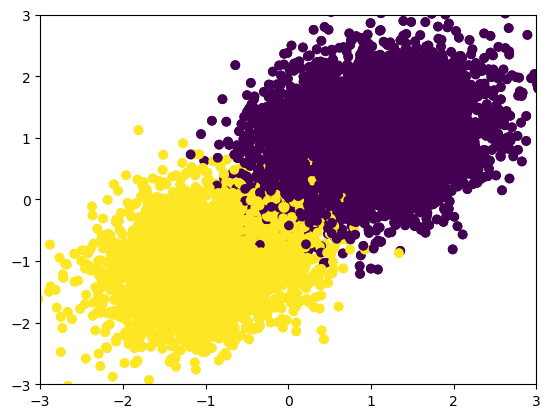

In [4]:
num_inputs=10**4

y=binomial(n=1,p=p,size=num_inputs)

data=[]
for i in range(num_inputs):
    if y[i]==0:
        x1,x2=multivariate_normal(mu_0,Sigma, size=1)[0]
    if y[i]==1:
        x1,x2=multivariate_normal(mu_1,Sigma, size=1)[0]
    r=[x1,x2,y[i]]
    data.append(r)
data=np.array(data)

df=pd.DataFrame(data=data,  columns=["x1","x2","y"])

# cm=plt.colormaps.get_cmap('RdYlBu')
for i in set(df.iloc[:,-1]):
    i=int(i)
    plt.scatter(df.iloc[:,0],df.iloc[:,1], c=df.iloc[:,-1])
plt.axis([-3,3,-3,3])
plt.show()

In [5]:
p0=len(df[df["y"]==0])
p1=len(df[df["y"]==1])
print(f"p1 = {p1}")
print(f"p0 = {p0}")

p1 = 2982
p0 = 7018


In [6]:
mu0=np.array(df[df["y"]==0].iloc[:,:2].mean(axis=0))
mu1=np.array(df[df["y"]==1].iloc[:,:2].mean(axis=0))
print(f"mu0 = {mu0}")
print(f"mu1 = {mu1}")

mu0 = [0.9952359  0.99514197]
mu1 = [-1.00234376 -0.99837693]


In [7]:
S=0
for i in df.index:
    a=np.array((df.iloc[:,:2]-mu0).iloc[i,:])
    b=np.array((df.iloc[:,:2]-mu1).iloc[i,:])
    S+=np.outer(a,b)/num_inputs
print(f"Sigma \n", pd.DataFrame(S))

vals,vecs=np.linalg.eig(S)
S1,S2=vals

theta=np.arctan2(vecs[:,0][1],vecs[:,0][0])

print(S1,S2)

Sigma 
           0         1
0  0.396466  0.092564
1  0.092564  0.386172
0.484026526082553 0.2986116795968843


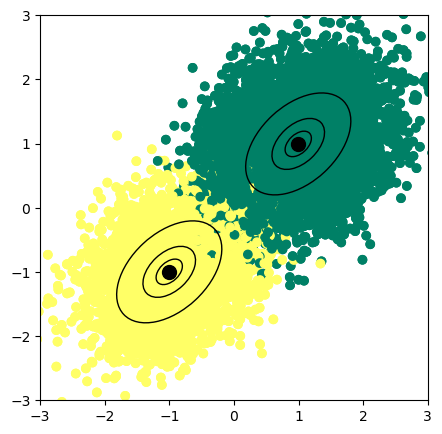

In [8]:
cm=plt.colormaps.get_cmap('summer')

fig,ax=plt.subplots(1,1, figsize=(5,5))
for i in set(df.iloc[:,-1]):
    i=int(i)
    ax.scatter(df.iloc[:,0],df.iloc[:,1], cmap=cm, c=df.iloc[:,-1])
ax.scatter(mu0[0],mu0[1], s=100, color="black")
ax.scatter(mu1[0],mu1[1], s=100, color="black")

ell1 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)

ell1 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)

plt.axis([-3,3,-3,3])
plt.show()

## Decision boundary

\begin{eqnarray}
    p(y|x) &=& \frac{p(x|y)p(y)}{p(x)}=\frac{1}{2} \\
    p(y=1|x) &=& 1/2 = p(y=0|x) \\
    p(x|y=1)p(y=1)&=&p(x|y=0)p(y=0) \\
    \log p(x|y=1)+\log p_1 &=& \log p(x|y=0)+\log p_0
\end{eqnarray}

\begin{eqnarray}
    x^{T} \Sigma (\mu_0-\mu_1) &=& \log \frac{p_1}{p_0}-\frac{1}{2}\left( -\mu_0^{T} \Sigma \mu_0 + \mu_1^{T} \Sigma \mu_1 \right) \\
    x^{T} \omega &=& ... \\
    x_1 \omega_1 +x_2 \omega_2 &=& ... \\
    x_2 &=& \frac{1}{\omega_2}\left( \log \frac{p_1}{p_0}-\frac{1}{2}\left( -\mu_0^{T} \Sigma \mu_0 + \mu_1^{T} \Sigma \mu_1 \right) - x_1 \omega_1 \right) \\
    x_2 &=& \frac{1}{\omega_2}\left(b-\omega_1 x_1\right)
\end{eqnarray}

In [9]:
omega=np.dot(S, mu0-mu1)
b=np.log(p1/p0)-1/2*(np.dot(mu0, np.dot(S,mu0)) -  np.dot(mu1, np.dot(S,mu1)))
b0=1/omega[1]*(b)
b1=-omega[0]/omega[1]
print(b0,b1)

xrange=np.linspace(-3,3,100)
yrange=b0+b1*xrange

-0.8911997180648981 -1.0227869816153317


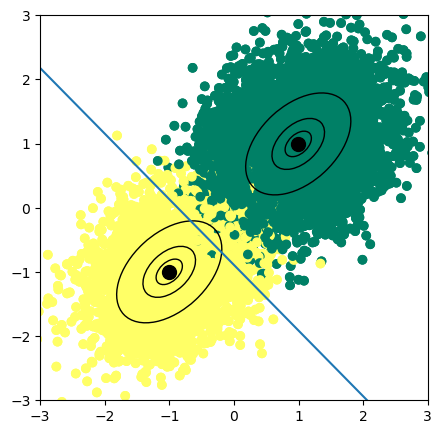

In [10]:
cm=plt.colormaps.get_cmap('summer')

fig,ax=plt.subplots(1,1, figsize=(5,5))
for i in set(df.iloc[:,-1]):
    i=int(i)
    ax.scatter(df.iloc[:,0],df.iloc[:,1], cmap=cm, c=df.iloc[:,-1])
ax.scatter(mu0[0],mu0[1], s=100, color="black")
ax.scatter(mu1[0],mu1[1], s=100, color="black")

ell1 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)

ell1 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)


## Decision boundary 
plt.plot(xrange,yrange)

plt.axis([-3,3,-3,3])
plt.show()

__Things to note:__
1. For an unbalanced binomial, the data will favor the more likely, thus skewing the decision boundary. Below, we compute the exact boundary to show it is not an effect of the data. For large data set, the decision boundary does converge. 
2. It is not the (apparently naive) guess that the "true" boundary is given by the line $y=-x$.


In [11]:
omega=np.dot(Sigma, mu_0-mu_1)
b=np.log(p/(1-p))-1/2*(np.dot(mu_0, np.dot(Sigma,mu_0)) -  np.dot(mu_1, np.dot(Sigma,mu_1)))
b0=1/omega[1]*(b)
b1=-omega[0]/omega[1]
print(b0,b1)

-0.8472978603872036 -1.0


# Everything all together

In [12]:
var_x=np.array([[1,0],[0,0]])
var_y=np.array([[0,0],[0,1]])
cov_xy=np.array([[0,1],[1,0]])
basis=[var_x,var_y,cov_xy]

Sigma 
 [[0.4 0.1]
 [0.1 0.4]]
mu_0=[0.8 0.8] and mu_1=[-0.8 -0.8]
p=0.4
Statitical results are below
p1 = 0.4162
p0 = 0.5838
mu0 = [0.78604066 0.79231289]
mu1 = [-0.79710245 -0.78904715]
Sigma 
           0         1
0  0.381182  0.099946
1  0.099946  0.408226
S1=0.2938475368611183 and S2=0.49556057808048193
Decision line: b0=-0.4173938981751133 and b1=-0.9474187534112489


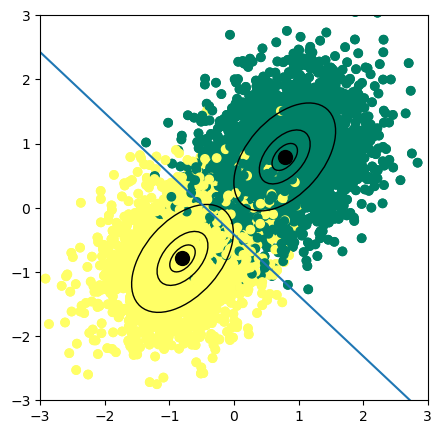

In [13]:
Sigma=np.array((.4,.4,.1))
Sigma=sum([s*b for s,b in zip(Sigma,basis)])
print(f"Sigma \n", Sigma)

r_0=np.array([1,1])
mu_0=.8*r_0
mu_1=-.8*r_0

print(f"mu_0={mu_0} and mu_1={mu_1}")

p=.4

print(f"p={p}")

print("Statitical results are below")

num_inputs=5*10**3

y=binomial(n=1,p=p,size=num_inputs)

data=[]
for i in range(num_inputs):
    if y[i]==0:
        x1,x2=multivariate_normal(mu_0,Sigma, size=1)[0]
    if y[i]==1:
        x1,x2=multivariate_normal(mu_1,Sigma, size=1)[0]
    r=[x1,x2,y[i]]
    data.append(r)
data=np.array(data)

df=pd.DataFrame(data=data,  columns=["x1","x2","y"])

p0=len(df[df["y"]==0])/len(data)
p1=len(df[df["y"]==1])/len(data)
print(f"p1 = {p1}")
print(f"p0 = {p0}")

mu0=np.array(df[df["y"]==0].iloc[:,:2].mean(axis=0))
mu1=np.array(df[df["y"]==1].iloc[:,:2].mean(axis=0))
print(f"mu0 = {mu0}")
print(f"mu1 = {mu1}")

S=0
for i in df.index:
    a=np.array((df.iloc[:,:2]-mu0).iloc[i,:])
    b=np.array((df.iloc[:,:2]-mu1).iloc[i,:])
    S+=np.outer(a,b)/num_inputs
print(f"Sigma \n", pd.DataFrame(S))

vals,vecs=np.linalg.eig(S)
S1,S2=vals

theta=np.arctan2(vecs[:,0][1],vecs[:,0][0])

print(f"S1={S1} and S2={S2}")

omega=np.dot(S, mu0-mu1)
b=np.log(p1/p0)-1/2*(np.dot(mu0, np.dot(S,mu0)) -  np.dot(mu1, np.dot(S,mu1)))
b0=1/omega[1]*(b)
b1=-omega[0]/omega[1]
print(f"Decision line: b0={b0} and b1={b1}")

xrange=np.linspace(-3,3,100)
yrange=b0+b1*xrange

cm=plt.colormaps.get_cmap('summer')

fig,ax=plt.subplots(1,1, figsize=(5,5))
for i in set(df.iloc[:,-1]):
    i=int(i)
    ax.scatter(df.iloc[:,0],df.iloc[:,1], cmap=cm, c=df.iloc[:,-1])
ax.scatter(mu0[0],mu0[1], s=100, color="black")
ax.scatter(mu1[0],mu1[1], s=100, color="black")

ell1 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu0[0], mu0[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)

ell1 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), S1,S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell2 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 2*S1, 2*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)
ell3 = matplotlib.patches.Ellipse((mu1[0], mu1[1]), 4*S1, 4*S2, color='black', fill=False,
                                    angle=360/(2*3.14)*theta)

ax.add_patch(ell1)
ax.add_patch(ell2)
ax.add_patch(ell3)


## Decision boundary 
plt.plot(xrange,yrange)

plt.axis([-3,3,-3,3])
plt.show()

## Further notes

1. While it does well for recovering parameters, GDA does poorly for the discrimination with large overlapp and $|p-1/2|>>0$
2. If both population had equal observations, then $p=\frac{1}{2}$.

### Exact decision boundaries for various $p_1$'s

In [14]:
p1=1/2
mu_0=.5*r_0
mu_1=-.5*r_0

omega=np.dot(Sigma, mu_0-mu_1)
b=np.log(p1/(1-p1))-1/2*(np.dot(mu_0, np.dot(Sigma,mu_0)) -  np.dot(mu_1, np.dot(Sigma,mu_1)))
b0=1/omega[1]*(b)
b1=-omega[0]/omega[1]
print(b0,b1)

0.0 -1.0


In [15]:
p1=.2
mu_0=.5*r_0
mu_1=-.5*r_0

omega=np.dot(Sigma, mu_0-mu_1)
b=np.log(p1/(1-p1))-1/2*(np.dot(mu_0, np.dot(Sigma,mu_0)) -  np.dot(mu_1, np.dot(Sigma,mu_1)))
b0=1/omega[1]*(b)
b1=-omega[0]/omega[1]
print(b0,b1)

-2.772588722239781 -1.0


# Using sklearn for two classes

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from numpy.random import multivariate_normal
from numpy.random import binomial
import time

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [17]:
Sigma=np.array((.4,.4,.1))
Sigma=sum([s*b for s,b in zip(Sigma,basis)])
print(f"Sigma \n", Sigma)

r_0=np.array([1,1])
mu_0=.8*r_0
mu_1=-.8*r_0

print(f"mu_0={mu_0} and mu_1={mu_1}")

p=.4

print(f"p={p}")

num_inputs=5*10**3

y=binomial(n=1,p=p,size=num_inputs)

data=[]
for i in range(num_inputs):
    if y[i]==0:
        x1,x2=multivariate_normal(mu_0,Sigma, size=1)[0]
    if y[i]==1:
        x1,x2=multivariate_normal(mu_1,Sigma, size=1)[0]
    r=[x1,x2,y[i]]
    data.append(r)
data=np.array(data)

df=pd.DataFrame(data=data,  columns=["x1","x2","y"])

Sigma 
 [[0.4 0.1]
 [0.1 0.4]]
mu_0=[0.8 0.8] and mu_1=[-0.8 -0.8]
p=0.4


In [20]:
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(df.iloc[:,:2],df.iloc[:,-1])

clf.priors_
print(f"p={clf.priors_[1]}")
mu0,mu1=clf.means_
print(f"mu_0={mu0} and mu_1={mu1}")
Sig=clf.covariance_
print(f"Sigma_0 \n", Sig[0])
print(f"Sigma_1 \n", Sig[1])

p=0.402
mu_0=[0.82538568 0.80802034] and mu_1=[-0.82174182 -0.80197745]
Sigma_0 
 [[0.39691849 0.10976028]
 [0.10976028 0.39519537]]
Sigma_1 
 [[0.42556869 0.12214919]
 [0.12214919 0.40627098]]


# Using sklearn for three classes with equal covariances

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

from numpy.random import multivariate_normal
from numpy.random import binomial
import time

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [33]:
var_x=np.array([[1,0],[0,0]])
var_y=np.array([[0,0],[0,1]])
cov_xy=np.array([[0,1],[1,0]])
basis=[var_x,var_y,cov_xy]

Sigma 
 [[0.4 0.1]
 [0.1 0.4]]
mu_0=[2.8 2.8], mu_1=[-2.8 -2.8], mu_2=[-2.8  2.8]
p1=0.4, p2=0.3


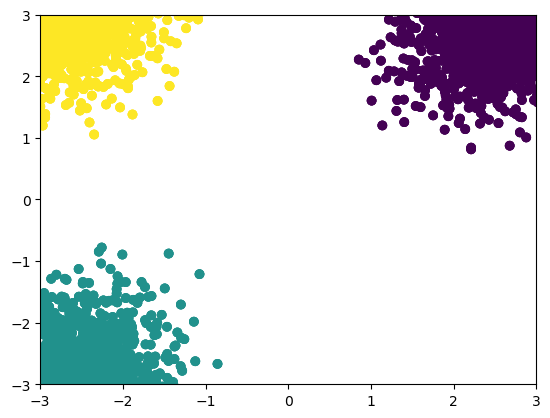

In [38]:
Sigma=np.array((.4,.4,.1))
Sigma=sum([s*b for s,b in zip(Sigma,basis)])
print(f"Sigma \n", Sigma)

r_0=np.array([1,1])
s_0=np.array([-1,1])
mu_0=2.8*r_0
mu_1=-2.8*r_0
mu_2=2.8*s_0

print(f"mu_0={mu_0}, mu_1={mu_1}, mu_2={mu_2}")

p1=.4
p2=.3

print(f"p1={p1}, p2={p2}")

num_inputs=5*10**3

y=np.random.multinomial(n=1,pvals=[p1,p2,1-p1-p2],size=num_inputs)

data=[]
for i in range(num_inputs):
    if np.linalg.norm(y[i]-np.array([1,0,0]))==0:
        phi=0
        x1,x2=multivariate_normal(mu_0,Sigma, size=1)[0]
    if np.linalg.norm(y[i]-np.array([0,1,0]))==0:
        phi=1
        x1,x2=multivariate_normal(mu_1,Sigma, size=1)[0]
    if np.linalg.norm(y[i]-np.array([0,0,1]))==0:
        phi=2
        x1,x2=multivariate_normal(mu_2,Sigma, size=1)[0]  
    r=[x1,x2,phi]
    data.append(r)
data=np.array(data)

df=pd.DataFrame(data=data,  columns=["x1","x2","y"])

for i in set(df.iloc[:,-1]):
    i=int(i)
    plt.scatter(df.iloc[:,0],df.iloc[:,1], c=df.iloc[:,-1])
plt.axis([-3,3,-3,3])
plt.show()

In [39]:
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
clf.fit(df.iloc[:,:2],df.iloc[:,-1])

print(f"priors={clf.priors_}")
mu0,mu1,mu2=clf.means_
print(f"mu_0={mu0}, mu_1={mu1},  mu_2={mu2}")

Sig=clf.covariance_
print(f"Sigma_0 \n", Sig[0])
print(f"Sigma_1 \n", Sig[1])
print(f"Sigma_2 \n", Sig[2])


priors=[0.4064 0.288  0.3056]
mu_0=[2.77796518 2.80421519], mu_1=[-2.77721643 -2.79426458],  mu_2=[-2.78616014  2.812741  ]
Sigma_0 
 [[0.40482278 0.09562077]
 [0.09562077 0.40231599]]
Sigma_1 
 [[0.39187767 0.09409476]
 [0.09409476 0.41035143]]
Sigma_2 
 [[0.41759358 0.11697106]
 [0.11697106 0.38983188]]


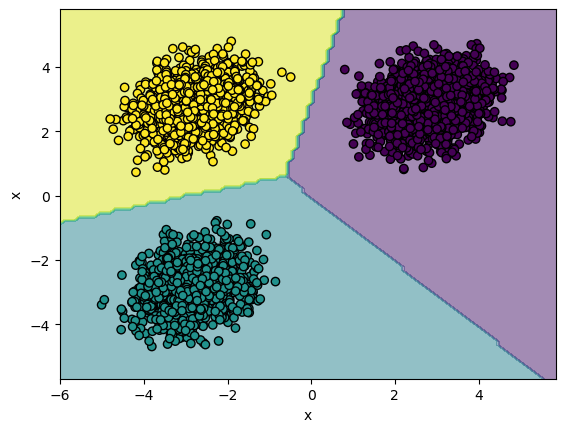

In [40]:
X=df.iloc[:,:-1]
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict",
    xlabel="x", ylabel="x",
    alpha=0.5)
disp.ax_.scatter(X.iloc[:,0], X.iloc[:,1], c=df.iloc[:,-1], edgecolor="k")
plt.show()

## Quick comparison to sklearn's logistic regression

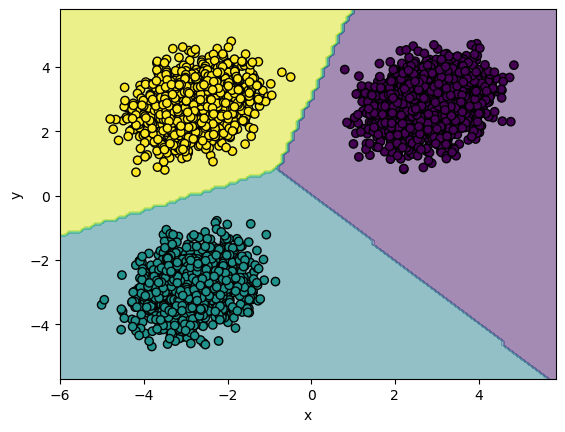

In [41]:
classifier = LogisticRegression().fit(X, df.iloc[:,-1])
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel="x", ylabel="y",
    alpha=0.5,
)
disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df.iloc[:,-1], edgecolor="k")
plt.show()